In [1]:
import seaborn as sns
import spacy
import nltk
from nltk import bigrams
#from nltk.corpus import stopwords
import pandas as pd
import itertools
import collections
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim  # don't skip this

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [109]:
tweets = pd.read_pickle("/Users/tomashegewisch/Desktop/all_6_months.pkl")
d1 = "2020-03-01"
d2 = "2020-08-31"
def get_date_range_for_tweet(date):
    date_1 = datetime.datetime.strptime(d1,'%Y-%m-%d')
    date_2 = datetime.datetime.strptime(d2,'%Y-%m-%d')
    date = date.to_pydatetime().strftime("%Y-%m-%d")
    date = datetime.datetime.strptime(date,'%Y-%m-%d')
    if date >= date_1 and date <= date_2:
        return True
    else:
        return False

tweets = tweets[tweets['date'].apply(lambda x : get_date_range_for_tweet(x)) == True]
# lob off the 
#tweets = tweets.head(500)

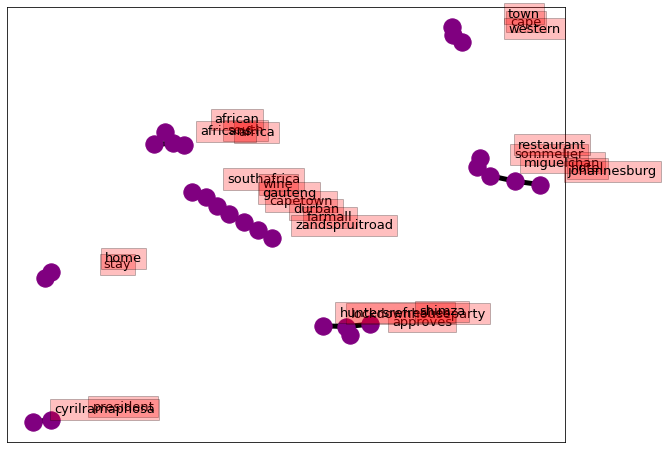

In [3]:
#https://www.earthdatascience.org
#/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-bigrams/
terms_bigram = [list(bigrams(t)) for t in tweets['tokenised']]
bigram = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigram)
# create a 
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("China", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=7,
                 width=5,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
# def ner(text):
#     temp = ""
#     for i in text:
#         temp += i +" "
#     doc = nlp(temp)
#     return [X.label_ for X in doc.ents]

# ent = tweets['tokenised'].apply(lambda x : ner(x))
# ent = [x for sub in ent for x in sub]
# counter = Counter(ent)

# count = counter.most_common()
# x,y=map(list,zip(*count))
# sns.barplot(x=y,y=x)

In [10]:
word_list = [] 
for i in tweets['tokenised']:
    for j in i:
        if j != "amp":
            word_list.append(j)
word_list = pd.DataFrame(word_list)

In [7]:
# def display(ents):
#     def get_ner_per_tweet_tk(text,ent=ents):
#         temp = ""
#         for i in text:
#             temp += i +" "
#         doc = nlp(temp)
#         return [X.text for X in doc.ents if X.label_ == ent]

#     gpe = word_list.apply(lambda x: get_ner_per_tweet_tk(x))
#     gpe = [x for x in gpe[0]]
#     counter = Counter(gpe)
#     x,y = map(list,zip(*counter.most_common(20)))
#     sns.barplot(y,x)
    
# display("PERSON")
# #display("GPE")
# # we will need to fidn a new way to clean as this is not returning a usefull result 

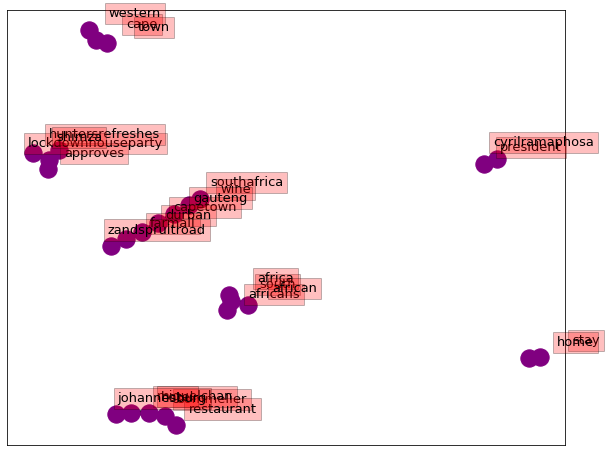

In [8]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

#G.add_node("china", weight=100)
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=7,
                 width=5,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

In [59]:
print(tweets['tweet'][0] + "\n")
print(tweets['tweet_clean'][0]+ "\n")
print(str(tweets['tokenised'][0]) + "\n")

#Yaaaoooo when your Uncle Mel &amp; Anut Sandra meet you in Capetown for dinner lol! Oh swipe for the vibes of the ambience... • #Brea#kingBread #RegalFam #TheGreatEscapeToTheCape #Capetown #SouthAfrica flow #MommaAfrica…  https://t.co/CMu1OAtXyL

when your Uncle Mel &amp; Anut Sandra meet you in Capetown for dinner lol! Oh swipe for the vibes of the ambience... flow

['yaaaoooo', 'uncle', 'mel', 'amp', 'anut', 'sandra', 'meet', 'capetown', 'dinner', 'lol', 'swipe', 'vibes', 'ambience', 'breakingbread', 'regalfam', 'thegreatescapetothecape', 'capetown', 'southafrica', 'flow', 'mommaafrica']



In [3]:
# Sentimnet
#https://www.machinelearningplus.com/time-series/time-series-analysis-python/
def get_sent(text):
    return TextBlob(text).sentiment.polarity
tweets['senti_values'] = tweets['tweet_clean'].apply(lambda x : get_sent(x))

In [63]:
# get the important dates first.  
# path = "/Users/tomashegewisch/research_project/Tomas/data/time_line.csv"
# import csv
# time_line = []
# with open(path) as text_file:
#     csv_reader = csv.reader(text_file, delimiter=';')
#     for i in csv_reader:
#         time_line.append(i)
# #time_line[100]

# # Encode the date
# time_line = pd.DataFrame(time_line, columns=time_line.pop(0))
# time_line['Date']= pd.to_datetime(time_line['Date'])

# def get_none(text):
#     if text == "":
#         return "na"
#     else:
#         return text
# # Drop The columes that have no context... We do not need to show that..
# time_line = time_line[time_line['Context'].apply(get_none) != "na"]

# def only_show_dates(date):
#     for i in time_line['Date']:
#         if i == date:
#             return date
#     return "na"

# tweets_for_timeline = tweets[tweets['date'].apply(only_show_dates) != "na"]

# #tweets_for_timeline = tweets_for_timeline[tweets_for_timeline.date == '2020-03-27']

In [11]:
word_list_counter = Counter(word_list[0])
def get_sent_for_top_words(text, lookout_word):
    if lookout_word not in text:
        return None
    else:
        return TextBlob(text).sentiment.polarity

for i in word_list_counter.most_common(10):
    tweet_senti_values = tweets['tweet_clean'].apply(lambda x : get_sent_for_top_words(x, i[0]))
    tweet_senti_values = tweet_senti_values.dropna(axis=0, inplace=False, how=None)
    #tweet_senti_values.hist()
    plt.hist(tweet_senti_values)
    plt.title('Sentiment around the word: ' + i[0])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.savefig("/Users/tomashegewisch/research_project/Tomas/charts/barchat/barchart_Sentiment_"+i[0]+".png")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [4]:
# get positive and geitive for the whole document
def get_value_positive(x):
    if x > 0.0:
        return x
    else:
        return None

def get_value_negitive(x):
    if x < 0.0:
        return x
    else:
        return None
#split
# we have removed the 0 from both 
tweets["positve"] = tweets['senti_values'].apply(get_value_positive)
tweets["negitive"] = tweets['senti_values'].apply(get_value_negitive)

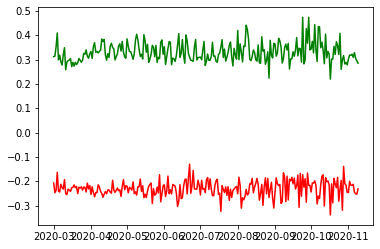

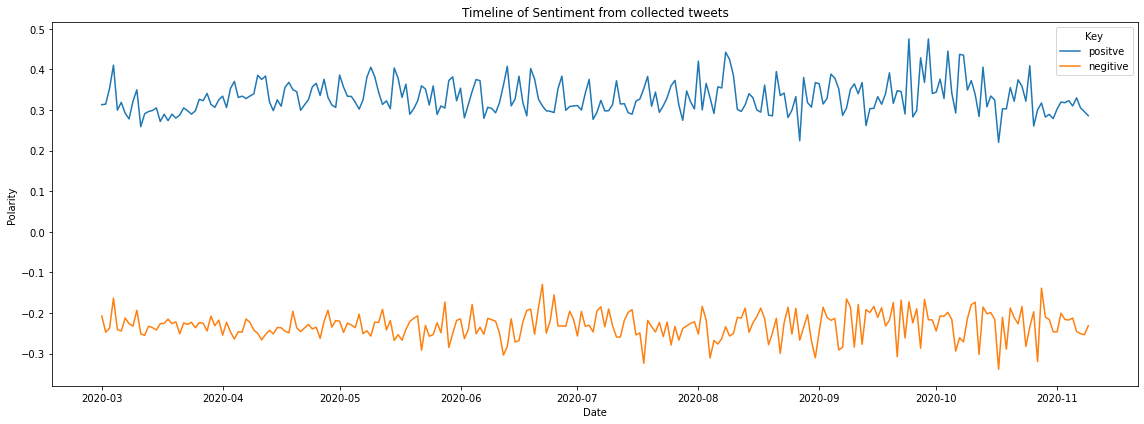

<Figure size 432x288 with 0 Axes>

In [5]:
positive_date_mean = tweets.groupby('date', as_index=False)['positve'].mean()
negitive_date_mean = tweets.groupby('date', as_index=False)['negitive'].mean()
plt.plot(positive_date_mean['date'], positive_date_mean['positve'], color='green')
plt.plot(negitive_date_mean['date'], negitive_date_mean['negitive'], color='red')
display_df_average = positive_date_mean
display_df_average['negitive'] = negitive_date_mean['negitive']
plt.figure(figsize=(16, 6))
sns.lineplot(x='Date',
             y='Polarity', 
             hue='Key',
             data= pd.melt(display_df_average, ['date']).rename(columns={"value": "Polarity","variable":"Key", "date":"Date"})
            ).set_title("Timeline of Sentiment from collected tweets").get_figure()
plt.tight_layout()

plt.savefig("/Users/tomashegewisch/research_project/Tomas/charts/Sentiment_"+"Timeline of sentiment from collected tweets.png")
plt.show()
plt.clf()
#testing_with_dates = positive_date_mean
# <Figure size 1440x432 with 0 Axes>
# <Figure size 432x288 with 0 Axes>

In [15]:
import datetime
import matplotlib.dates as mdates 

def get_key_word(text, kw):
    if kw in text:
        return True
    else:
        return "no"
    
# want to find the date range 
def get_the_date(month_code):
    moths_dates = {1:['2020-03-01','2020-03-31',"March"],
                  2:['2020-04-01','2020-04-30', "April"],
                  3:['2020-05-01','2020-05-31', "May"],
                  4:['2020-06-01','2020-06-30', "June"],
                  5:['2020-07-01','2020-07-31', "July"],
                  6:['2020-08-01','2020-08-31', "August"],
                  7:['2020-09-01','2020-09-30', "September"],
                  8:['2020-10-01','2020-10-31', "October"]}
    return moths_dates[month_code]

# retrunr if the date is not in the rage
def get_date_range(date, d1, d2):
    date_1 = datetime.datetime.strptime(d1,'%Y-%m-%d')
    date_2 = datetime.datetime.strptime(d2,'%Y-%m-%d')
    date = date.to_pydatetime().strftime("%Y-%m-%d")
    date = datetime.datetime.strptime(date,'%Y-%m-%d')
    if date >= date_1 and date <= date_2:
        return True
    else:
        return False
    
# group by date
# lets group one score for everydate in our 
# we will use the ave of that day. addition of all the socre / number of entry 

for i in range(1,9):
    nedded_dates = get_the_date(i)
    for i in word_list_counter.most_common(1):
        # select start and end date
        # Drop The columes that do not include the key_word
        key_word = i[0]
        key_word_sentimnet_score_all = tweets[tweets['tweet'].apply(lambda x : get_key_word(x,key_word)) == True]
        key_word_sentimnet_score_all = key_word_sentimnet_score_all[key_word_sentimnet_score_all['date'].apply(lambda x : get_date_range(x, nedded_dates[0], nedded_dates[1])) == True]
        positive_date_mean = key_word_sentimnet_score_all.groupby('date', as_index=False)['positve'].mean()
        negitive_date_mean = key_word_sentimnet_score_all.groupby('date', as_index=False)['negitive'].mean()
        # ASK RICH ABOUT THIS SECTION OF CODE>>> What it does is adds the prvious value to the NaN sections.
        NaN_test = pd.isnull(positive_date_mean)
        temp = 0.0 
        for i in range(0, len(NaN_test)):
            try:
                if NaN_test['positve'][i] == True:

                    positive_date_mean['positve'][i] = temp
                else:
                    temp = positive_date_mean['positve'][i]
            except:
                continue
        NaN_test = pd.isnull(negitive_date_mean)
        temp = 0.0
        for i in range(0, len(NaN_test)):
            try:
                if NaN_test['negitive'][i] == True:
                    negitive_date_mean['negitive'][i] = temp
                else:
                    temp = negitive_date_mean['negitive'][i]
            except:
                continue 

        # Dsiplay The files.
        display_df_average = positive_date_mean
        display_df_average['negitive'] = negitive_date_mean['negitive']
        plt.figure(figsize=(16, 6))
        sns.lineplot(x='Date', y='Polarity', hue='Key', 
             data=pd.melt(display_df_average, ['date']).rename(columns={"value": "Polarity","variable":"Key", "date":"Date"})).set_title("The Sentiment for " + str(nedded_dates[2]) + " of Topic: "+key_word).get_figure().autofmt_xdate()
        plt.tight_layout()
        plt.savefig("/Users/tomashegewisch/research_project/Tomas/charts/line_sentiment/Sentiment_"+key_word+"_"+str(nedded_dates[2])+".png")
        plt.clf()

<ipython-input-15-4f4755df6f07>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negitive_date_mean['negitive'][i] = temp
<ipython-input-15-4f4755df6f07>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_date_mean['positve'][i] = temp
<ipython-input-15-4f4755df6f07>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negitive_date_mean['negitive'][i] = temp
<ipython-input-15-4f4755df6f07>:54: SettingWithCopyWarning: 
A value is

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [114]:
#drill down code
def drill_down_date_topic(topic_word, date_1, date_2):
    key_word = topic_word
    nedded_dates = [date_1, date_2]
    key_word_sentimnet_score_all = tweets[tweets['tweet'].apply(lambda x : get_key_word(x,key_word)) == True]
    key_word_sentimnet_score_all = key_word_sentimnet_score_all[key_word_sentimnet_score_all['date'].apply(lambda x : get_date_range(x, nedded_dates[0], nedded_dates[1])) == True]
    positive_date_mean = key_word_sentimnet_score_all.groupby('date', as_index=False)['positve'].mean()
    negitive_date_mean = key_word_sentimnet_score_all.groupby('date', as_index=False)['negitive'].mean()
    # ASK RICH ABOUT THIS SECTION OF CODE>>> What it does is adds the prvious value to the NaN sections.
    NaN_test = pd.isnull(positive_date_mean)
    temp = 0.0 
    for i in range(0, len(NaN_test)):
        try:
            if NaN_test['positve'][i] == True:
                positive_date_mean['positve'][i] = temp
            else:
                temp = positive_date_mean['positve'][i]
        except:
            continue
    NaN_test = pd.isnull(negitive_date_mean)
    temp = 0.0
    for i in range(0, len(NaN_test)):
        try:
            if NaN_test['negitive'][i] == True:
                negitive_date_mean['negitive'][i] = temp
            else:
                temp = negitive_date_mean['negitive'][i]
        except:
            continue 

        # Dsiplay The files.
    display_df_average = positive_date_mean
    display_df_average['negitive'] = negitive_date_mean['negitive']
    plt.figure(figsize=(16, 6))
    sns.lineplot(x='Date',
                 y='Polarity',
                 hue='Key',
                 data=pd.melt(display_df_average, 
                              ['date']).rename(columns={"value": "Polarity","variable":"Key", "date":"Date"})).set_title("The Sentiment for " + str(nedded_dates) + " of Topic: "+key_word).get_figure().autofmt_xdate()
    plt.tight_layout()
    print(nedded_dates)
    plt.show()
    #plt.savefig("/Users/tomashegewisch/research_project/Tomas/charts/Sentiment_"+key_word+"_"+str(nedded_dates[0])+"_"+str(nedded_dates[1])+".png")
    plt.clf()

drill_down_date_topic("covid", '2020-04-09', '2020-04-22')

TypeError: get_date_range() takes 1 positional argument but 3 were given

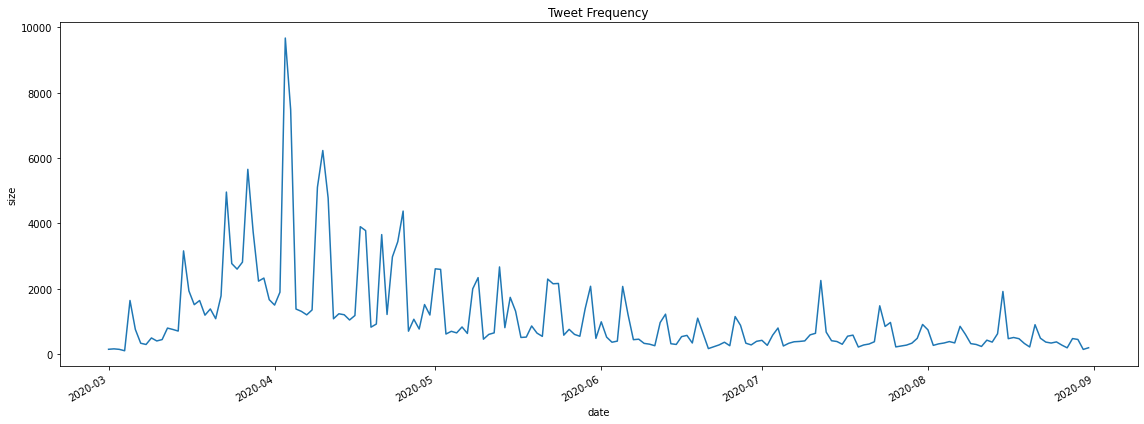

<Figure size 432x288 with 0 Axes>

In [113]:
#Frequency of posting
post_feq = tweets.groupby('date', as_index=False).size()
post_feq
plt.figure(figsize=(16, 6))
sns.lineplot(x='date',
                 y='size',
                 data=post_feq).set_title("Tweet Frequency").get_figure().autofmt_xdate()
plt.tight_layout()
plt.show()
plt.savefig("/Users/tomashegewisch/research_project/Tomas/charts/tweet_frequency.png")
plt.clf()

In [118]:
def get_time_line_of_hastages(find_word):
    def get_if_hastag(htags_list):
        for i in htags_list:
            if i == find_word[0]:
                return True
        return False
    specific_hastage_tweets = tweets[tweets['hashtags'].apply(lambda x : get_if_hastag(x)) == True]
    post_feq = specific_hastage_tweets.groupby('date', as_index=False).size()
    plt.figure(figsize=(16, 6))
    sns.lineplot(x='date',
                 y='size',
                 data=post_feq).set_title("Frequency for: "+str(find_word)).get_figure().autofmt_xdate()
    plt.tight_layout()
    #plt.show()
    plt.savefig("/Users/tomashegewisch/research_project/Tomas/charts/Frequency/feq_"+str(find_word[0])+".png")
    plt.clf()
for i in Counter(hashtags).most_common(10):
    get_time_line_of_hastages(i)

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

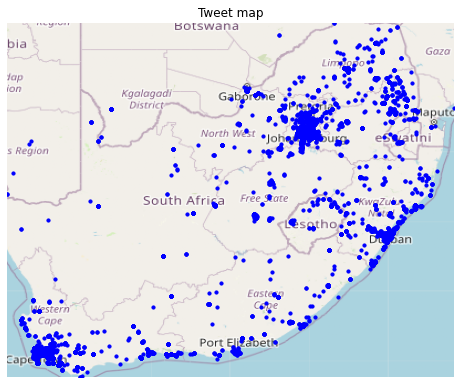

In [53]:
# Show the map
# for i in tweets['coordinates']:
#     print(i)

#WE MUST GET THE MAP AGAIN SINCE THIS IS NOW WITH ALL THE DATA AND THAT MEAN A BIGGER MAP LOL

places = []
for i in tweets['place']:
    try:
        places.append(i['coordinates'])
    except:
        continue

ruh_m = plt.imread('/Users/tomashegewisch/research_project/Tomas/data/map.png')
map_points = pd.DataFrame(places)
map_points.columns = ['latitude', 'longitude']

#Latitude: -28.4793 Longitude: 24.6727.

fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(map_points.longitude, map_points.latitude, zorder=1, alpha= 1, c='b', s=10)

BBox = ((map_points.longitude.min(),   map_points.longitude.max(),      
         map_points.latitude.min(), map_points.latitude.max()))

ax.set_title('Tweet map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.axis("off") 
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

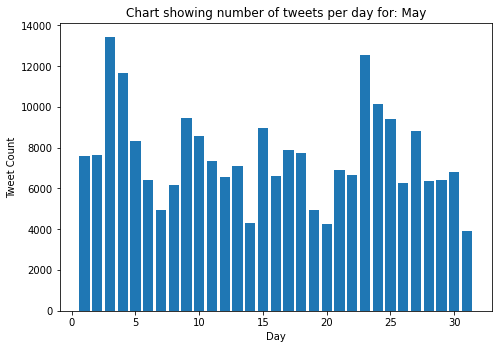

In [16]:
# Time line

# temp = ""
# for i in range(1,32):
#     temp+=str(i) + ":0,"
# temp

date_dict = {1:0,2:0,3:0,4:0,
             5:0,6:0,7:0,8:0,9:0,
             10:0,11:0,12:0,13:0,
             14:0,15:0,16:0,17:0,18:0,
             19:0,20:0,21:0,22:0,23:0,
             24:0,25:0,26:0,27:0,28:0,
             29:0,30:0,31:0}

for i in tweets["date"]:
    value = int(i.to_pydatetime().strftime("%d"))
    date_dict[value] = date_dict[value]+1

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(list(date_dict.keys()),list(date_dict.values()))
ax.set_ylabel('Tweet Count')
ax.set_xlabel('Day')
ax.set_title('Chart showing number of tweets per day for: 1-6')
plt.show()

56725
166086


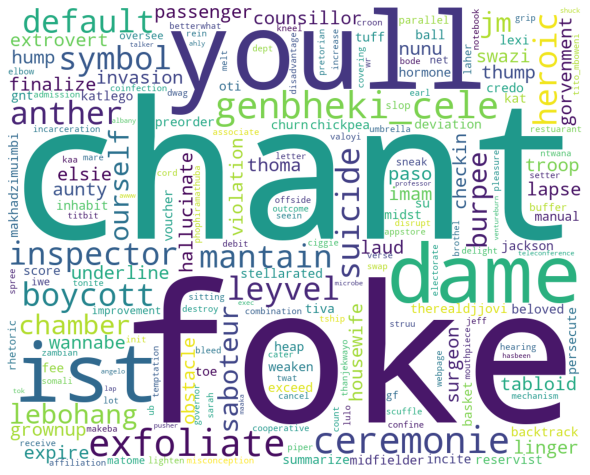

In [48]:
#word Cloud all words... no hash tags
 
from wordcloud import WordCloud, STOPWORDS 
hashtags = []
# #create a list of hashtages
for i in tweets['hashtags']:
    for j in i:
        hashtags.append(j)

mentions = []
        
x = set(word_list[0].tolist())
y = set(hashtags)
x.difference_update(y)
cleaned_words_no_hashtags = list(x)

text=(" ").join(cleaned_words_no_hashtags)
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(text) 
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

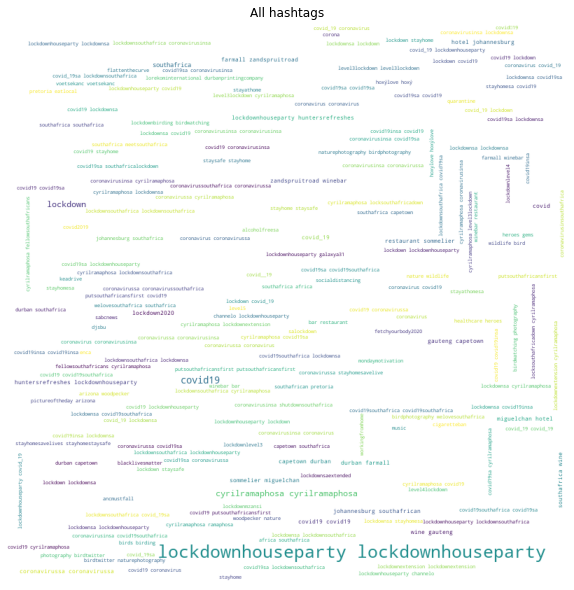

[('lockdownhouseparty', 67004), ('covid19', 20291), ('southafrica', 17158), ('lockdownsa', 15056), ('cyrilramaphosa', 14880), ('lockdown', 11899), ('covid19sa', 11286), ('coronavirussa', 9797), ('covid_19', 8055), ('lockdownsouthafrica', 7118)]


In [101]:
# word cloud only hastages
text=(" ").join(hashtags)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',  
                min_font_size = 7).generate(text) 
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("All hashtags", color = "black", size = 12)
plt.tight_layout(pad = 0) 
plt.show()

#print(Counter(hashtags).most_common(10))

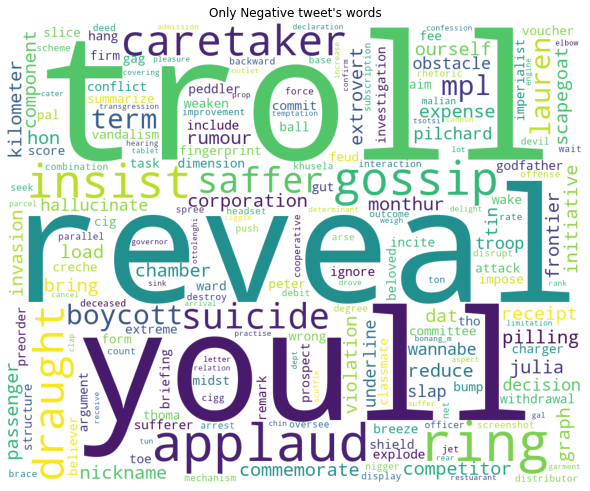

In [77]:
# word cloud with negitive sentimnet tweets.
negitive_tweets_words_list = []

for i in range(0, len(tweets)):
    try:
        if tweets['senti_values'][i] < 0:
            for j in tweets['tokenised'][i]:
                negitive_tweets_words_list.append(j)
    except:
        continue

x = set(negitive_tweets_words_list)
y = set(hashtags)
x.difference_update(y)
negitve_words_no_hashtags = list(x)

#cleaned_words_no_hashtags_negitive

text = " ".join(negitve_words_no_hashtags)
wordcloud = WordCloud(width = 1000, height = 800, 
               background_color ='white',  
               min_font_size = 12).generate(text)  
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Only Negative tweet's words", size = 12, color = "black")
plt.tight_layout(pad = 0)
plt.show()

In [107]:
# pair wise corrolation
word_list = ['covid19', 
'southafrica', 
'lockdownsa', 
'cyrilramaphosa', 
'lockdown', 
'covid19sa',
'coronavirussa',
'covid_19', 
'lockdownsouthafrica',
'government']



In [ ]:
for i in tweets:
    print(i)

In [ ]:
#TOPIC Modelling

# Create Dictionary
id2word = corpora.Dictionary(tweets['tokenised'])

# Create Corpus
texts = tweets['tokenised']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

In [ ]:
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)